In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt



In [3]:
df = pd.read_csv("us-counties.csv")



In [4]:
Georgia    = df[df.state == "Georgia"]
Alabama = df[df.state == "Alabama"]




In [5]:
#np.sort(Alabama.county.unique())


In [89]:
border_AL = np.array([
'Cleburne',
'Henry',
'Barbour',
'Randolph',
'Cherokee',
'Chambers',
])




In [90]:
agg_AL = Alabama[Alabama.county.isin(border_AL)]

In [91]:
agg_AL.index = agg_AL.date.astype("datetime64").values

In [92]:
agg_AL

,date,county,state,fips,cases,deaths
2020-03-19,2020-03-19,Chambers,Alabama,1017.0,1,0
2020-03-20,2020-03-20,Chambers,Alabama,1017.0,1,0
2020-03-21,2020-03-21,Chambers,Alabama,1017.0,1,0
2020-03-22,2020-03-22,Chambers,Alabama,1017.0,2,0
2020-03-23,2020-03-23,Chambers,Alabama,1017.0,2,0
...,...,...,...,...,...,...
2020-11-12,2020-11-12,Chambers,Alabama,1017.0,1514,48
2020-11-12,2020-11-12,Cherokee,Alabama,1019.0,870,15
2020-11-12,2020-11-12,Cleburne,Alabama,1029.0,646,11
2020-11-12,2020-11-12,Henry,Alabama,1067.0,799,6


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



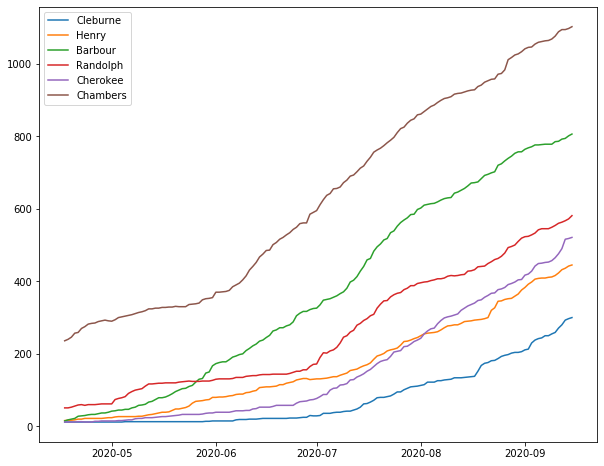

In [72]:
start_date = dt.date(2020,6,16)
end_date = dt.date(2020,8,16)

agg_AL = Alabama[Alabama.county.isin(border_AL)]
agg_AL.index = agg_AL.date.astype("datetime64").values
agg_AL["week"] = agg_AL.date.astype("datetime64").dt.week
plt.figure(figsize = (10,8))
agg_AL = agg_AL[(agg_AL.index > "2020-04-16") & (agg_AL.index < "2020-9-16") ]
for county in border_AL:
    data = agg_AL[agg_AL.county == county]
    plt.plot(data.index,data.cases,label = str(county))
plt.legend()
plt.show()



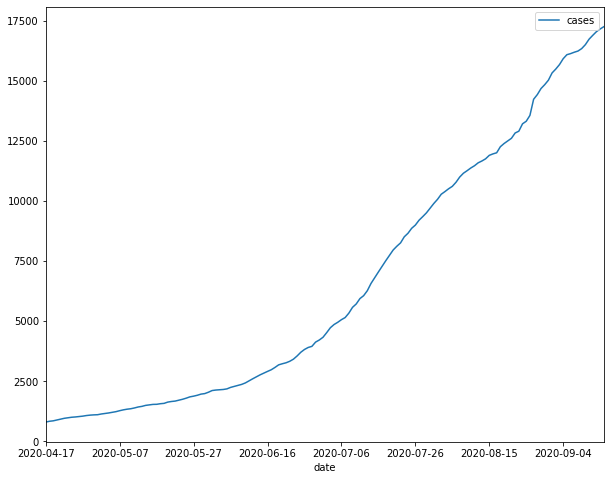

In [39]:
agg_AL.groupby("date").sum().plot(y = "cases",figsize= (10,8))
plt.show()

In [40]:
end_date

datetime.date(2020, 8, 16)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



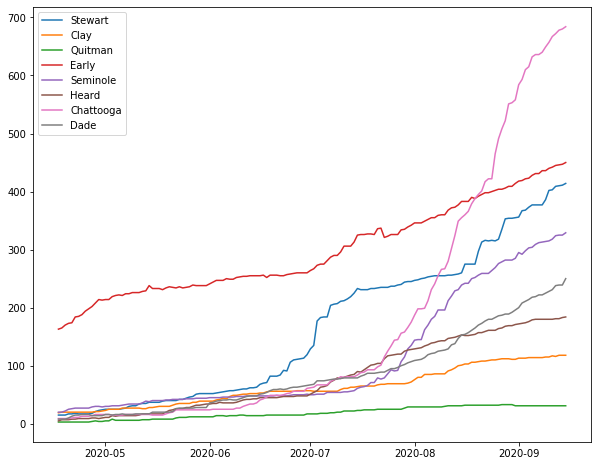

In [80]:
agg_GA = Georgia[Georgia.county.isin(border_GA)]
agg_GA.index = agg_GA.date.astype("datetime64").values
agg_GA["week"] = agg_GA.date.astype("datetime64").dt.week
plt.figure(figsize = (10,8))
agg_GA = agg_GA[(agg_GA.index > "2020-04-16") & (agg_GA.index < "2020-9-16") ]
for county in border_GA:
    data = agg_GA[agg_GA.county == county]
    plt.plot(data.index,data.cases,label = str(county))
plt.legend()
plt.show()

In [79]:
border_GA = np.array([
"Stewart",
"Clay",
"Quitman",
"Early",
"Seminole",
"Heard",
"Chattooga",
"Dade"    ,   
])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>



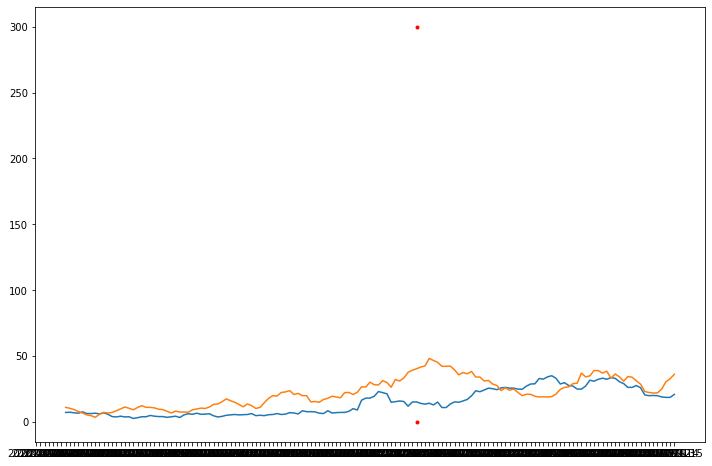

In [81]:
data_GA = agg_GA.groupby("date").sum().diff().rolling(7).mean()
data_AL = agg_AL.groupby("date").sum().diff().rolling(7).mean()
plt.figure(figsize = (12,8))
plt.plot(data_GA.cases)
plt.plot(data_AL.cases)
plt.plot(["2020-07-16","2020-07-16"],[0,300],".",color = "red")
plt.locator_params(axis='x', nbins=10)
plt.show()

In [23]:
data_AL.cases.rolling(5).mean()

date
2020-04-17           NaN
2020-04-18           NaN
2020-04-19           NaN
2020-04-20           NaN
2020-04-21           NaN
                 ...    
2020-09-11    130.285714
2020-09-12    120.057143
2020-09-13    120.171429
2020-09-14    123.514286
2020-09-15    128.800000
Name: cases, Length: 152, dtype: float64

In [82]:
# import plotly.graph_objects as go
import pandas as pd

data_GA = agg_GA.groupby("date").sum().diff().rolling(1).mean()
data_AL = agg_AL.groupby("date").sum().diff().rolling(1).mean()



# Create figure and add line
fig = go.Figure()


rolling_means = [1,7,14,30]
trace_view = np.array([False for _ in range(8)])

buttons = []

for i,rm in enumerate(rolling_means):
    
    data_GA = agg_GA.groupby("date").sum().diff().rolling(rm).mean()
    data_AL = agg_AL.groupby("date").sum().diff().rolling(rm).mean()
    
    fig.add_trace(go.Scatter(
        x=data_AL.index,
        y=data_AL.cases,
        mode="lines",
        name = "Alabama (Mask Mandate)"
    ))

    fig.add_trace(go.Scatter(
        x=data_GA.index,
        y=data_GA.cases,
        mode="lines",
        name = "Georgia (No Mask Mandate)"
    ))
    
    view = trace_view.copy()
    view[i*2:i*2+2] = True
    
    buttons.append(dict(label=str(rm) + " Day Moving Average",
         method="update",
         args=[{"visible": view},
               {"title": str(rm) + " Day Moving Average",
                "annotations": []}]) ) 
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons
        )
    ])


# Set custom x-axis labels
fig.update_xaxes(
    ticktext=["May 16th", "June 16th","July 16th: Mandate Initiated", "August 16th", "September 16th"],
    tickvals=["2020-05-16","2020-06-16", "2020-07-16", "2020-08-16", data_AL.index.max()],
)

# Set figure title
fig.update_layout(title_text="Georgia vs Alabama Transmission Rates (Change in New Cases)")

fig.show()

In [83]:
import plotly.graph_objects as go
import pandas as pd

# Create figure and add line
fig = go.Figure()


rolling_means = [1,7,14,30]
trace_view = np.array([False for _ in range(8)])

buttons = []

for i,rm in enumerate(rolling_means):
    
    data_GA = agg_GA.groupby("week").sum().diff()[:-1]
    data_AL = agg_AL.groupby("week").sum().diff()[:-1]
    
    fig.add_trace(go.Scatter(
        x=data_AL.index,
        y=data_AL.cases,
        mode="lines",
        name = "Alabama (Mask Mandate)"
    ))

    fig.add_trace(go.Scatter(
        x=data_GA.index,
        y=data_GA.cases,
        mode="lines",
        name = "Georgia (No Mask Mandate)"
    ))
    
    view = trace_view.copy()
    view[i*2:i*2+2] = True
    
    buttons.append(dict(label=str(rm) + " Day Moving Average",
         method="update",
         args=[{"visible": view},
               {"title": str(rm) + " Day Moving Average",
                "annotations": []}]) ) 
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons
        )
    ])


# Set custom x-axis labels
fig.update_xaxes(
    ticktext=["May 16th", "June 16th","July 16th: Mandate Initiated", "August 16th", "September 16th"],
    tickvals=["2020-05-16","2020-06-16", "2020-07-16", "2020-08-16", data_AL.index.max()],
)

# Set figure title
fig.update_layout(title_text="Georgia vs Alabama Transmission Rates (Change in New Cases)")

fig.show()

In [28]:
agg_GA.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()

,fips,cases,deaths
date,,,
2020-04-17,NaN,NaN,NaN
2020-04-18,NaN,NaN,NaN
2020-04-19,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN
...,...,...,...
2020-09-11,0.0,1943.766667,49.366667
2020-09-12,0.0,1924.433333,48.633333
2020-09-13,0.0,1892.933333,47.766667


In [33]:
agg_GA.date.astype("datetime64").dt.week

array([16, 16, 16, ..., 38, 38, 38])

In [35]:

data_GA 

,fips,cases,deaths
date,,,
2020-04-17,NaN,NaN,NaN
2020-04-18,NaN,NaN,NaN
2020-04-19,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN
...,...,...,...
2020-09-11,0.0,1943.766667,49.366667
2020-09-12,0.0,1924.433333,48.633333
2020-09-13,0.0,1892.933333,47.766667


In [37]:
agg_GA.groupby("week").sum()

,fips,cases,deaths
week,,,
16,671181.0,3157,131
17,1566089.0,8904,365
18,1566089.0,10507,463
19,1566089.0,11644,580
20,1566089.0,12822,659
21,1566089.0,14633,733
22,1566089.0,17449,804
23,1566089.0,21446,883
24,1566089.0,26844,1018


In [84]:
import plotly.graph_objects as go
import pandas as pd

data_GA = agg_GA.groupby("week").sum().rolling(1).mean()
data_AL = agg_AL.groupby("date").sum().rolling(1).mean()



# Create figure and add line
fig = go.Figure()


rolling_means = [1,7,14,30]
trace_view = np.array([False for _ in range(8)])

buttons = []

for i,rm in enumerate(rolling_means):
    
    data_GA = agg_GA.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()
    data_AL = agg_AL.groupby("date").sum().rolling(10).sum().rolling(rm).mean().diff()
    
    fig.add_trace(go.Scatter(
        x=data_AL.index,
        y=data_AL.cases,
        mode="lines",
        name = "Alabama (Mask Mandate)"
    ))

    fig.add_trace(go.Scatter(
        x=data_GA.index,
        y=data_GA.cases,
        mode="lines",
        name = "Georgia (No Mask Mandate)"
    ))
    
    view = trace_view.copy()
    view[i*2:i*2+2] = True
    
    buttons.append(dict(label=str(rm) + " Day Moving Average",
         method="update",
         args=[{"visible": view},
               {"title": str(rm) + " Day Moving Average",
                "annotations": []}]) ) 
    
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons
        )
    ])


# Set custom x-axis labels
fig.update_xaxes(
    ticktext=["May 16th", "June 16th","July 16th: Mandate Initiated", "August 16th", "September 16th"],
    tickvals=["2020-05-16","2020-06-16", "2020-07-16", "2020-08-16", data_AL.index.max()],
)

# Set figure title
fig.update_layout(title_text="Georgia vs Alabama Transmission Rates (Change in New Cases)")

fig.show()